In [1]:
# Basic library imports

import pandas as pd
import numpy as np

In [2]:
# Pre-processed crime data frame

chicagoCrimeData = pd.read_csv("../Data/crimeData.csv", low_memory=False)

In [3]:
# Checking the data load correctly using head property

chicagoCrimeData.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Day,Month,Hour,Minute
0,60283,11556037,JC103643,2019-01-03 19:20:00,0000X W RWY 27R,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,0,0,...,26,1100374,1943906.0,2019,42.002816,-87.906094,3,1,19,20
1,62201,11626027,JC188126,2019-03-16 17:58:00,001XX N WELLS ST,0460,BATTERY,SIMPLE,0,0,...,08B,1174723,1900866.0,2019,41.883369,-87.633860,16,3,17,58
2,62541,11622422,JC183696,2019-03-12 22:00:00,008XX E 38TH PL,0820,THEFT,$500 AND UNDER,0,0,...,06,1182276,1879784.0,2019,41.825347,-87.606781,12,3,22,0
3,62573,11625922,JC185669,2019-03-14 18:42:00,074XX N PAULINA ST,0460,BATTERY,SIMPLE,0,0,...,08B,1163827,1949311.0,2019,42.016542,-87.672499,14,3,18,42
4,62574,11622907,JC185406,2019-03-14 16:03:00,008XX E 38TH PL,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,0,1,...,26,1182227,1879766.0,2019,41.825299,-87.606961,14,3,16,3


In [4]:
# Information of columns

chicagoCrimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944348 entries, 0 to 2944347
Data columns (total 24 columns):
Unnamed: 0        int64
ID                int64
Case Number       object
Date              object
Block             object
IUCR              object
Primary Type      object
Description       object
Arrest            int64
Domestic          int64
Beat              int64
District          float64
Ward              float64
Community Area    float64
FBI Code          object
X Coordinate      object
Y Coordinate      float64
Year              int64
Latitude          float64
Longitude         float64
Day               int64
Month             int64
Hour              int64
Minute            int64
dtypes: float64(6), int64(10), object(8)
memory usage: 539.1+ MB


In [5]:
# Process to extract top 10 crime types data

topCrimes = chicagoCrimeData['Primary Type'].value_counts()[:10].index.tolist()

In [6]:
topCrimesData = chicagoCrimeData.loc[chicagoCrimeData['Primary Type'].isin(topCrimes)]

In [7]:
# Shape of data after keeping only Top 10 crime records

topCrimesData.shape

(2705668, 24)

In [8]:
# Dropping unnecessary columns

topCrimesData = topCrimesData.drop(["Unnamed: 0","Case Number","Block","IUCR","Description","FBI Code","Date"], axis=1)

In [9]:
# Using label encoder for Target variable

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

topCrimesData['PrimaryTypeCat'] =  labelencoder_X.fit_transform(topCrimesData['Primary Type'])

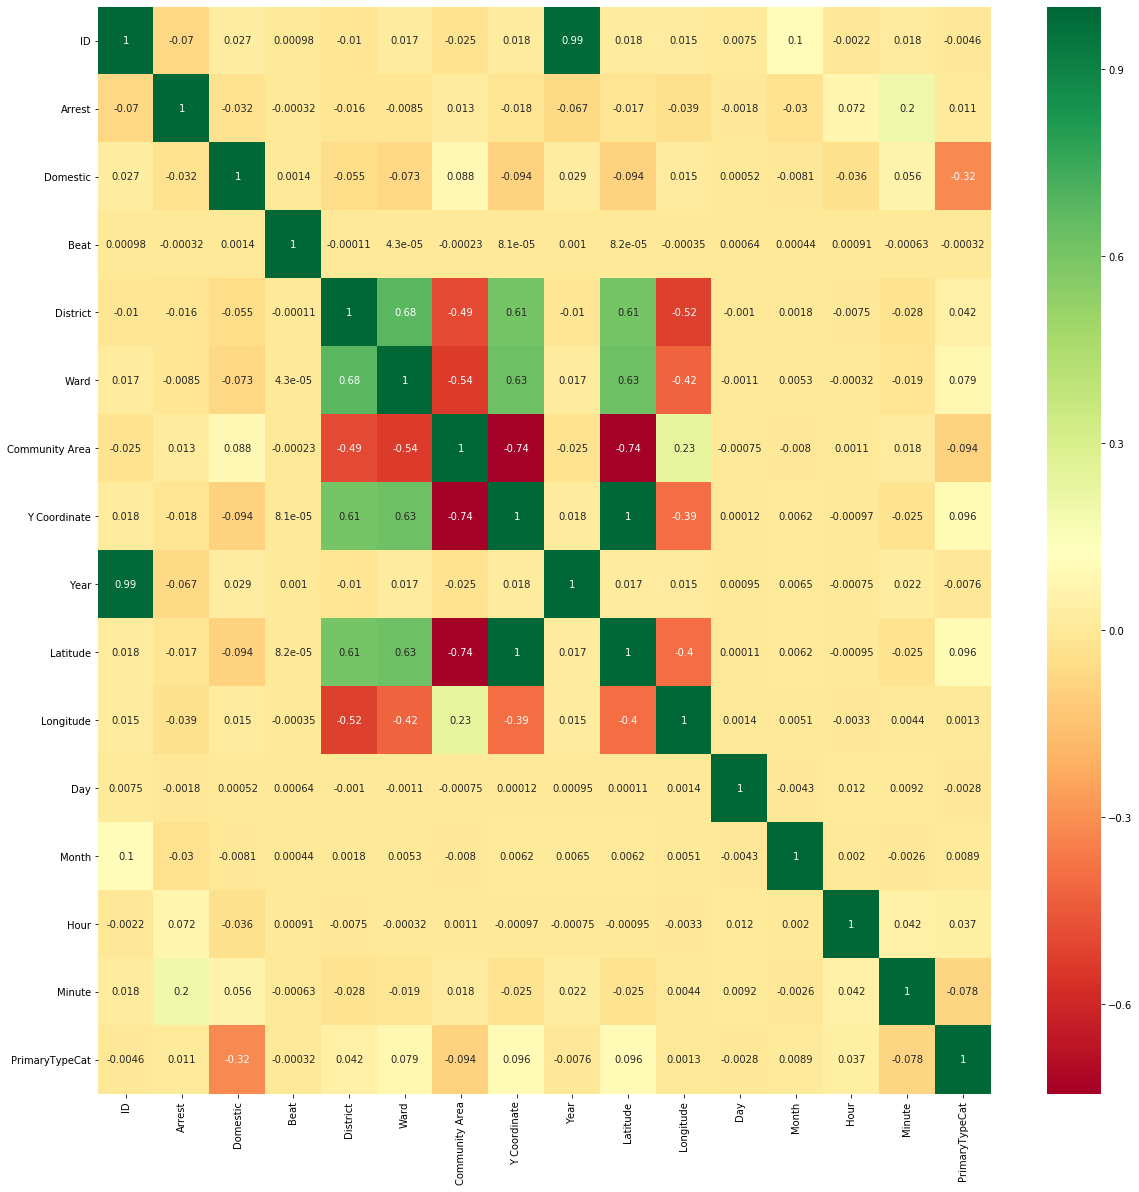

In [11]:
# Correlation matrix for all the variables

import matplotlib.pyplot as plt
import seaborn as sns

#get correlations of each features in dataset
corrmat = topCrimesData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(topCrimesData[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# Keeping only top features required for the modelling phase
# Removing the label encoded column as well as we can again encode it before model building

topCrimesData = topCrimesData.drop(["ID","Arrest","Beat","Ward","Community Area","X Coordinate","Y Coordinate","PrimaryTypeCat"], axis=1)

In [13]:
# Model for 11th District

crimeDataDistrict11 = topCrimesData.loc[topCrimesData['District']==11.0]
crimeDataDistrict8 = topCrimesData.loc[topCrimesData['District']==8.0]
crimeDataDistrict6 = topCrimesData.loc[topCrimesData['District']==6.0]
crimeDataDistrict4 = topCrimesData.loc[topCrimesData['District']==4.0]
crimeDataDistrict25 = topCrimesData.loc[topCrimesData['District']==25.0]

In [14]:
crimeDataDistrict11.head()

,Primary Type,Domestic,District,Year,Latitude,Longitude,Day,Month,Hour,Minute
21,BATTERY,0,11.0,2019,41.884925,-87.711121,21,4,6,0
23,BATTERY,1,11.0,2019,41.872643,-87.716307,23,4,16,16
70,BATTERY,1,11.0,2019,41.901679,-87.721398,23,5,12,0
118,BATTERY,0,11.0,2019,41.879293,-87.741485,14,5,0,56
137,NARCOTICS,0,11.0,2019,41.899168,-87.709164,27,5,0,58


In [15]:
# Saving the top 5 district in different CSV's

crimeDataDistrict11.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeDataDistrict11.csv')
crimeDataDistrict8.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeDataDistrict8.csv')
crimeDataDistrict6.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeDataDistrict6.csv')
crimeDataDistrict4.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeDataDistrict4.csv')
crimeDataDistrict25.to_csv (r'C:\Users\bhayy\OneDrive\Desktop\Final Year Project\New folder\crimeDataDistrict25.csv')